### How well do jobs and skills pay for Data Scientists?

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_UK = df[(df['job_country'] == 'United Kingdom')].dropna(subset=['salary_year_avg'])

In [9]:
job_titles = df_UK['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [25]:
df_UK_top6 = df_UK[df_UK['job_title_short'].isin(job_titles)] 

job_order = df_UK_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index 



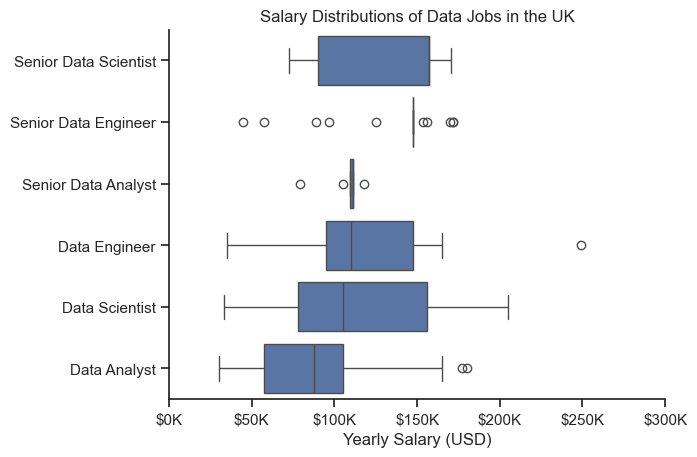

In [27]:
sns.boxplot(data=df_UK_top6, x='salary_year_avg', y='job_title_short', order= job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the UK')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

### Investigating median salary vs skill for data scientists 

In [46]:
# Only get data analyst jobs in the UK
df_SA_UK = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United Kingdom')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DS_UK = df_DA_UK.dropna(subset=['salary_year_avg'])

df_DS_UK = df_DA_UK.explode('job_skills')

df_DS_UK[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1107,157500.0,python
1107,157500.0,numpy
1107,157500.0,pandas
1107,157500.0,scikit-learn
13764,109500.0,excel


In [53]:
df_DS_top_pay = df_DS_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DS_top_pay = df_DS_top_pay.head(10)

df_DS_top_pay

,count,median
job_skills,,
scala,1,205000.0
word,1,165000.0
redshift,2,162500.0
pyspark,1,160000.0
keras,3,160000.0
java,1,157500.0
power bi,8,145030.0
github,3,139216.0
windows,1,139216.0


In [51]:
df_DS_sklls = df_DS_UK.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending =False)
df_DS_sklls = df_DS_sklls.head(10).sort_values(by='median', ascending = False)
df_DS_sklls

,count,median
job_skills,,
gcp,9,131867.0
looker,9,113500.0
r,18,113360.5
tableau,15,111500.0
sql,46,97985.0
python,50,89885.0
aws,22,88128.0
pandas,9,88128.0
numpy,9,88128.0


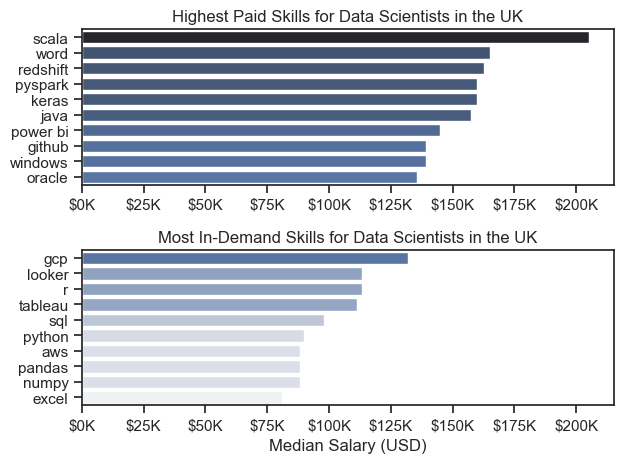

In [55]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Scientists 
sns.barplot(data=df_DS_top_pay, x='median', y=df_DS_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Scientists in the UK')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Scientists')
sns.barplot(data=df_DS_sklls, x='median', y=df_DS_sklls.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Scientists in the UK')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()